In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statistics
from scipy import stats
from scipy.stats import norm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pymc3


df = pd.read_csv("Prestigio.csv", sep = ',', na_values = '-', encoding= 'unicode_escape')
df.dropna(inplace=True)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Opção 1 - Regressão: *Education e Income*

In [2]:
mod = ols('df.prestige ~ df.income + df.education',data=df)
res = mod.fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     207.9
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           2.00e-35
Time:                        01:04:07   Log-Likelihood:                -334.33
No. Observations:                  98   AIC:                             674.7
Df Residuals:                      95   BIC:                             682.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.6210      3.116     -2.446      0.016     -13.808      -1

### Opção 1 - VIF

In [3]:
y, X = dmatrices('prestige ~ income + df.education', df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

VIF Factor      features
0   17.147364     Intercept
1    1.491621        income
2    1.491621  df.education


### Opção 2 - Regressão: * Education e Income e respectiva interação*

In [4]:
mod = ols('df.prestige ~ df.income * df.education',data=df)
res = mod.fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     148.8
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           1.43e-35
Time:                        01:04:08   Log-Likelihood:                -331.07
No. Observations:                  98   AIC:                             670.1
Df Residuals:                      94   BIC:                             680.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -22.4323      6.558     -3.421 

### Opção 2 - VIF

In [5]:
y, X = dmatrices('prestige ~ income * df.education', df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

VIF Factor             features
0   80.324156            Intercept
1   33.276948               income
2    4.510336         df.education
3   47.051137  income:df.education


### Opção 3 - Regressão: *Education e Income, ambas padronizadas*

In [6]:
income_pad = df.income - np.mean(df.income)
education_pad = df.education - np.mean(df.education)

mod = ols('df.prestige ~ income_pad + education_pad',data=df)
res = mod.fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     207.9
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           2.00e-35
Time:                        01:04:09   Log-Likelihood:                -334.33
No. Observations:                  98   AIC:                             674.7
Df Residuals:                      95   BIC:                             682.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        47.3276      0.753     62.890      0.000      45.834     

### Opção 3 - VIF

In [7]:
y, X = dmatrices('prestige ~ income_pad + education_pad', df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

VIF Factor       features
0    1.000000      Intercept
1    1.491621     income_pad
2    1.491621  education_pad


#### Opção 3 - Regressão: *Sem Intercepto*

In [8]:
income_pad = df.income - np.mean(df.income)
education_pad = df.education - np.mean(df.education)

mod = ols('df.prestige ~ income_pad + education_pad - 1',data=df)
res = mod.fit()
print(res.summary())

OLS Regression Results                                
Dep. Variable:            df.prestige   R-squared (uncentered):                   0.093
Model:                            OLS   Adj. R-squared (uncentered):              0.074
Method:                 Least Squares   F-statistic:                              4.927
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                     0.00918
Time:                        01:04:09   Log-Likelihood:                         -518.21
No. Observations:                  98   AIC:                                      1040.
Df Residuals:                      96   BIC:                                      1046.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

#### Opção 3 - VIF *Sem Intercepto*

In [9]:
y, X = dmatrices('prestige ~ income_pad + education_pad - 1', df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

VIF Factor       features
0    1.491621     income_pad
1    1.491621  education_pad


### Opção 4 - Regressão: *Education e Income, ambas padronizadas, e respectiva interação*

In [10]:
income_pad = df.income - np.mean(df.income)
education_pad = df.education - np.mean(df.education)

mod = ols('df.prestige ~ income_pad * education_pad',data=df)
res = mod.fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     148.8
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           1.43e-35
Time:                        01:04:10   Log-Likelihood:                -331.07
No. Observations:                  98   AIC:                             670.1
Df Residuals:                      94   BIC:                             680.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   48.5671      0.879     5

### Opção 4 - VIF

In [11]:
y, X = dmatrices('prestige ~ income_pad * education_pad', df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

VIF Factor                  features
0    1.442496                 Intercept
1    2.624255                income_pad
2    1.521856             education_pad
3    1.950390  income_pad:education_pad


#### Opção 4 - Regressão: *Sem Intercepto*

In [12]:
income_pad = df.income - np.mean(df.income)
education_pad = df.education - np.mean(df.education)

mod = ols('df.prestige ~ income_pad * education_pad - 1',data=df)
res = mod.fit()
print(res.summary())

OLS Regression Results                                
Dep. Variable:            df.prestige   R-squared (uncentered):                   0.334
Model:                            OLS   Adj. R-squared (uncentered):              0.313
Method:                 Least Squares   F-statistic:                              15.85
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                    1.96e-08
Time:                        01:04:11   Log-Likelihood:                         -503.12
No. Observations:                  98   AIC:                                      1012.
Df Residuals:                      95   BIC:                                      1020.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

#### Opção 4 - VIF *Sem Intercepto*

In [13]:
y, X = dmatrices('prestige ~ income_pad * education_pad - 1', df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

VIF Factor                  features
0    2.276811                income_pad
1    1.512581             education_pad
2    1.658851  income_pad:education_pad


----

In [14]:
# Simula o conjunto de dados do Sildenafil
data = np.concatenate((np.repeat(1, 183), np.repeat(0, 379-183)), axis=0)

In [19]:
# Cria o modelo com priori Beta(alpha, beta) e Verossimilhança Beroulli(p)
def create_model_pymc3(data):
    with pymc3.Model() as model:
        p = pymc3.Beta('theta', alpha=2, beta=3)
        bernoulli = pymc3.Bernoulli('bernoulli', p=p, observed=data)
    return model

In [16]:
model = create_model_pymc3(data)

# Estima a probabilidade de sucesso da Bernoulli por MAp
map_estimate = pymc3.find_MAP(model=model)
map_estimate


logp = -262.7, ||grad|| = 6.5: 100%|██████████| 6/6 [00:00<00:00, 153.84it/s]


{'theta_logodds__': array(-0.06862851), 'theta': array(0.4828496)}

In [17]:
model

In [20]:
model = create_model_pymc3(data)

# Estima a probabilidade de sucesso da Bernoulli por MAp
map_estimate = pymc3.find_MAP(model=model)
map_estimate


logp = -267.26, ||grad|| = 31.2: 100%|██████████| 6/6 [00:00<00:00, 166.67it/s]


{'theta_logodds__': array(-0.07333128), 'theta': array(0.48167539)}

In [21]:
model

----

In [22]:
def create_model_pymc(data):
    with pymc3.Model() as model:
        trace = pymc3.sample(1000, tune=1000, cores=1)
    return model

In [23]:
model = create_model_pymc

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:32<00:00, 61.83it/s]


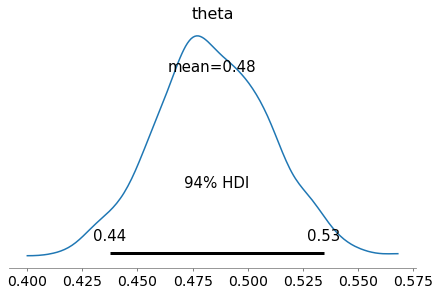

In [18]:
# Usa MCMC para gerar observações da posteriori (método de cálculo da posteriori por simulação)

with model:

    trace = pymc3.sample(1000, tune=1000, cores=1)

# Faz o gráfico da posteriori, calcula sua média e o intervalo de credibilidade

pymc3.plot_posterior(trace);